In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import preprocess_input
from datetime import datetime

# Preparing The Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive'

MyDrive


In [ ]:
import pathlib
data_dir = pathlib.Path('/content/drive/MyDrive/Knee Osteoarthritis Dataset with Severity Grading 3 class/val')

In [ ]:
data_dir

PosixPath('/content/drive/MyDrive/Knee Osteoarthritis Dataset with Severity Grading 3 class/val')

In [ ]:
!ls '/content/drive/MyDrive/Knee Osteoarthritis Dataset with Severity Grading 3 class/val'

0  1  2


/content/drive/MyDrive/Knee Osteoarthritis Dataset with Severity Grading 3 class/val/2/9617213R.png


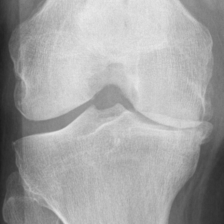

In [ ]:
roses = list(data_dir.glob('2/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))

In [ ]:
#Give dataset path
train_path = '/content/drive/MyDrive/Knee Osteoarthritis Dataset with Severity Grading 3 class/train'
val_path = '/content/drive/MyDrive/Knee Osteoarthritis Dataset with Severity Grading 3 class/test'
test_path = '/content/drive/MyDrive/Knee Osteoarthritis Dataset with Severity Grading 3 class/val'

Working with 4848 images
Image examples: 
9095865R.png


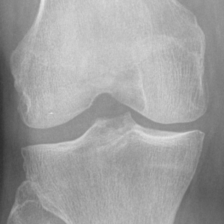

9362121L.png


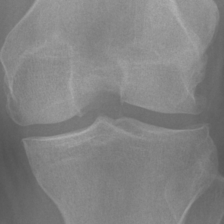

9521254R.png


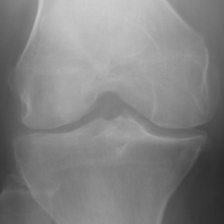

9459295R.png


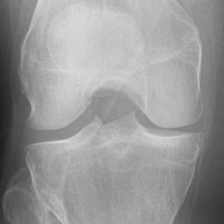

9035449L.png


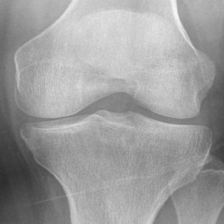

9316607R.png


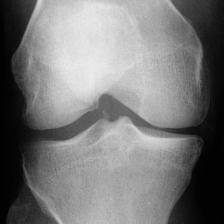

9793657R.png


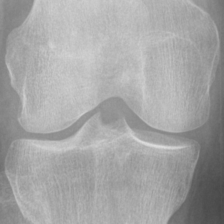

9440518R.png


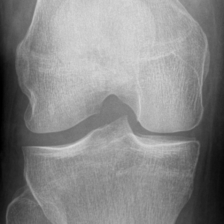

9764936L.png


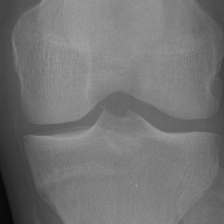

9478184L.png


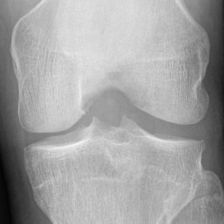

In [ ]:
from PIL import Image
import os
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object


folder = train_path+'/0'


only_0_files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(only_0_files)))
print("Image examples: ")


for i in range(10):
    print(only_0_files[i])
    display(_Imgdis(filename=folder + "/" + only_0_files[i], width=240, height=240))

In [ ]:
train_datagen = ImageDataGenerator(
    # preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
val_datagen = ImageDataGenerator(
    # preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator(
    # preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                              color_mode="rgb",
                                                 batch_size = 32,
                                              shuffle=True,
                                                 class_mode = 'categorical',
                                          seed=42)

Found 5778 images belonging to 3 classes.


In [ ]:
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            color_mode="rgb",
                                            batch_size = 32,
                                          shuffle=True,
                                            class_mode = 'categorical',
                                          save_to_dir= "/content/drive/MyDrive/Knee Osteoarthritis Dataset with Severity Grading 3 class/augmented_val_set",
                                          save_format="png",
                                          seed=42)

Found 1656 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(224,224),
                                            color_mode="rgb",
                                            batch_size=1,
                                            shuffle=False,
                                            class_mode=None,
                                            seed = 42)

Found 826 images belonging to 3 classes.


In [ ]:
# fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(100,100))
# k=0
# for i in range(10):
#   for j in range(10):
#     ax[i][j].imshow(val_set[k][0][0], cmap="gray")
#     k+=1

# Training The Model


In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=3,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(3, activation='softmax'))

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
resnet_model.summary()

NameError: ignored

In [ ]:
resnet_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

epochs=50

start = datetime.now()

model_checkpoint = ModelCheckpoint("/content/drive/MyDrive/Knee Osteoarthritis Dataset with Severity Grading 3 class/best_model_resnet 1st stage "+ datetime.now().strftime("%Y-%m-%d %H:%M:%S") + ".h5", save_best_only=True)

es1 = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

history = resnet_model.fit_generator(train_set, validation_data=val_set, epochs=epochs, callbacks=[es1, model_checkpoint], verbose=2)
duration = datetime.now() - start
print("Training completed in time: ", duration)

<ipython-input-20-0547bd2c72f2>:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = resnet_model.fit_generator(train_set, validation_data=val_set, epochs=epochs, callbacks=[es1, model_checkpoint], verbose=2)


Epoch 1/50
181/181 - 2282s - loss: 0.3100 - accuracy: 0.8354 - val_loss: 0.2671 - val_accuracy: 0.8364 - 2282s/epoch - 13s/step
Epoch 2/50
181/181 - 147s - loss: 0.2597 - accuracy: 0.8465 - val_loss: 0.2950 - val_accuracy: 0.8261 - 147s/epoch - 810ms/step
Epoch 3/50
181/181 - 149s - loss: 0.2484 - accuracy: 0.8527 - val_loss: 0.2585 - val_accuracy: 0.8448 - 149s/epoch - 824ms/step
Epoch 4/50
181/181 - 147s - loss: 0.2408 - accuracy: 0.8494 - val_loss: 0.2557 - val_accuracy: 0.8400 - 147s/epoch - 811ms/step
Epoch 5/50
181/181 - 171s - loss: 0.2397 - accuracy: 0.8519 - val_loss: 0.2474 - val_accuracy: 0.8412 - 171s/epoch - 944ms/step
Epoch 6/50
181/181 - 152s - loss: 0.2386 - accuracy: 0.8574 - val_loss: 0.2436 - val_accuracy: 0.8514 - 152s/epoch - 838ms/step
Epoch 7/50
181/181 - 150s - loss: 0.2325 - accuracy: 0.8577 - val_loss: 0.2571 - val_accuracy: 0.8430 - 150s/epoch - 827ms/step
Epoch 8/50
181/181 - 149s - loss: 0.2327 - accuracy: 0.8593 - val_loss: 0.2381 - val_accuracy: 0.8533 - 

In [ ]:
pretrained_model.trainable = True
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 24,638,339
Trainable params: 24,585,219
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
resnet_model.compile(
    optimizer = Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:

epochs = 50

start = datetime.now()

es2 = EarlyStopping(monitor='val_accuracy', mode='max', patience=10,  restore_best_weights=True)

model_checkpoint = ModelCheckpoint("/content/drive/MyDrive/Knee Osteoarthritis Dataset with Severity Grading 3 class/best_model_resnet 2nd stage "+ datetime.now().strftime("%Y-%m-%d %H:%M:%S") + ".h5", save_best_only=True)

history = resnet_model.fit_generator(train_set, validation_data=val_set, epochs=epochs, callbacks=[es2, model_checkpoint], verbose=2)

duration = datetime.now() - start
print("Training completed in time: ", duration)

<ipython-input-23-5d30f16c9c34>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = resnet_model.fit_generator(train_set, validation_data=val_set, epochs=epochs, callbacks=[es2, model_checkpoint], verbose=2)


Epoch 1/50
181/181 - 210s - loss: 0.2691 - accuracy: 0.8418 - val_loss: 0.3049 - val_accuracy: 0.8424 - 210s/epoch - 1s/step
Epoch 2/50
181/181 - 164s - loss: 0.2018 - accuracy: 0.8799 - val_loss: 0.2270 - val_accuracy: 0.8611 - 164s/epoch - 904ms/step
Epoch 3/50
181/181 - 162s - loss: 0.1727 - accuracy: 0.8972 - val_loss: 0.2736 - val_accuracy: 0.8448 - 162s/epoch - 896ms/step
Epoch 4/50
181/181 - 167s - loss: 0.1559 - accuracy: 0.9114 - val_loss: 0.2142 - val_accuracy: 0.8720 - 167s/epoch - 925ms/step
Epoch 5/50
181/181 - 189s - loss: 0.1443 - accuracy: 0.9187 - val_loss: 0.2190 - val_accuracy: 0.8768 - 189s/epoch - 1s/step
Epoch 6/50
181/181 - 162s - loss: 0.1366 - accuracy: 0.9200 - val_loss: 0.1631 - val_accuracy: 0.9076 - 162s/epoch - 894ms/step
Epoch 7/50
181/181 - 190s - loss: 0.1261 - accuracy: 0.9259 - val_loss: 0.1552 - val_accuracy: 0.9106 - 190s/epoch - 1s/step
Epoch 8/50
181/181 - 189s - loss: 0.1217 - accuracy: 0.9301 - val_loss: 0.4145 - val_accuracy: 0.7579 - 189s/epoc

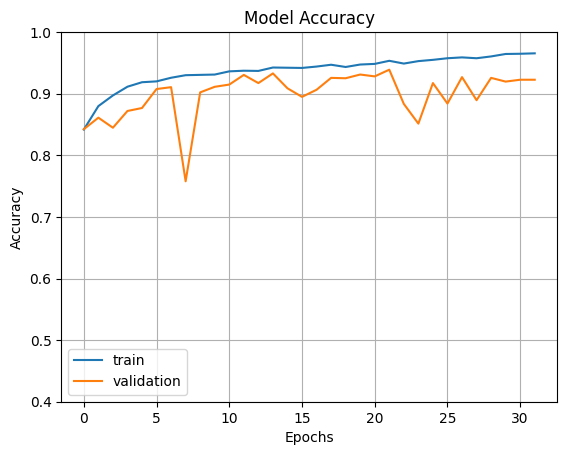

<Figure size 640x480 with 0 Axes>

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()
plt.savefig("/content/drive/MyDrive/Knee Osteoarthritis Dataset with Severity Grading 3 class/best_model_accuracy_graph_resnet "+ datetime.now().strftime("%Y-%m-%d %H:%M:%S") + ".png")

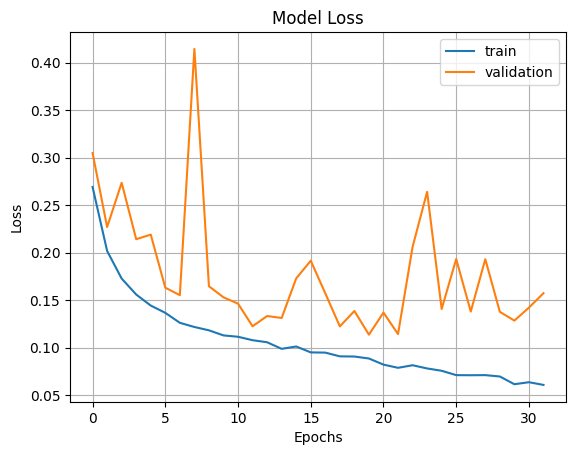

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()
plt.savefig("/content/drive/MyDrive/Knee Osteoarthritis Dataset with Severity Grading 3 class/best_model_loss_graph_resnet "+ datetime.now().strftime("%Y-%m-%d %H:%M:%S") + ".png")

# Evaluate the model

In [ ]:
start = datetime.now()

val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            color_mode="rgb",
                                            batch_size = 1,
                                          shuffle=True,
                                            class_mode = 'categorical',
                                          save_to_dir= "/content/drive/MyDrive/Knee Osteoarthritis Dataset with Severity Grading 3 class/augmented_val_set",
                                          save_format="png",
                                          seed=42)

history = resnet_model.evaluate_generator(generator= val_set)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Found 1656 images belonging to 3 classes.


<ipython-input-26-74d7e854b89e>:13: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  history = resnet_model.evaluate_generator(generator= val_set)


Training completed in time:  0:01:07.943822


In [ ]:
history

[0.12848450243473053, 0.9365941882133484]

# Making Predictions

In [ ]:
history = resnet_model.predict_generator(test_set, verbose=2)

<ipython-input-28-062380e223a1>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  history = resnet_model.predict_generator(test_set, verbose=2)


826/826 - 627s - 627s/epoch - 759ms/step


In [ ]:
history

array([[1.0000000e+00, 1.6839965e-11, 2.6593777e-15],
       [1.0000000e+00, 9.4837027e-11, 1.1204774e-14],
       [1.0000000e+00, 9.3927977e-10, 1.4959972e-13],
       ...,
       [4.4043577e-06, 1.4045193e-04, 9.9985516e-01],
       [1.5899925e-04, 1.4466737e-02, 9.8537421e-01],
       [2.8783259e-06, 5.6593153e-06, 9.9999142e-01]], dtype=float32)

In [ ]:
type(history)

numpy.ndarray

In [ ]:
predicted_class_indices=np.argmax(history,axis=1)

In [ ]:
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [ ]:
import pandas as pd

filenames=test_set.filenames
results=pd.DataFrame({"best_model_evaluation_accuracy_graph_resnet "+ datetime.now().strftime("%Y-%m-%d %H:%M:%S"):filenames,
                      "Predictions":predictions})
results.to_csv("/content/drive/MyDrive/Knee Osteoarthritis Dataset with Severity Grading 3 class/results.csv",index=False)

In [ ]:
results

,best_model_evaluation_accuracy_graph_resnet 2023-08-31 18:23:19,Predictions
0,0/9003380L.png,0
1,0/9003380R.png,0
2,0/9006140L.png,0
3,0/9006140R.png,0
4,0/9009067L.png,0
...,...,...
821,2/9824005L.png,1
822,2/9928082L.png,2
823,2/9961951L.png,2
824,2/9971710L.png,2


import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(results, *['Predictions'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(results, *['Predictions'], **{})
chart

In [ ]:
import cv2
image=cv2.imread(str(roses[0]))
image_resized= cv2.resize(image, (224,224))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


(1, 224, 224, 3)


In [ ]:
image = np.asarray(image).astype('float32')
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 0s 38ms/step
[[0.02641542 0.9713598  0.00222478]]


In [ ]:
output_class=np.argmax(pred)
print("The predicted class is", output_class)

The predicted class is 1
